In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    Samplers,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
import pickle

from ema_workbench.util import utilities
from ema_workbench.analysis import prim, cart

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Open Exploration

- No policy (everything 0)
- Latin hypercube of scenarios (10.000 scenarios)
- Result: choose 20 to 50 scenarios

First, the model is initialized, using problem formulation 5.

In [3]:
# initiate model
dike_model, planning_steps = get_model_for_problem_formulation(5)

Then, a reference policy is initialized, in which all policy variables are set to 0.

In [4]:
# set reference policy as all 0's
reference = Policy("0_policy", **{l.name: 0 for l in dike_model.levers})

if we decide to include the timestep:this saves the seperate timesteps to a csv.

In [5]:
n_scenarios = 50

# running the model through EMA workbench, using Latin Hypercube Sampling and the reference policy
with MultiprocessingEvaluator(dike_model, n_processes=-1) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios, policies=reference, uncertainty_sampling=Samplers.LHS)

utilities.save_results(results,'50ScenariosBaseCase.csv')

[MainProcess/INFO] pool started with 11 workers
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [00:05<00:00,  8.69it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to C:\Users\beren\Documents\TU_Delft\M_Jaar_1\Q4\Model_based_decision_making\github_map\EPA1361_Model-based_Decision-making\Final Assignment EPA1361\50ScenariosBaseCase.csv


In [6]:
test = pd.read_csv('50ScenariosBaseCase.csv', compression='gzip',on_bad_lines='skip').dropna()
test

,experiments.csv,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,41.0,340.653808,1.5,0.242375,39.110263,1.5,0.973726,166.498069,1.5,0.140513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0_policy,dikesnet
1,61.0,230.850164,1.0,0.822864,252.318826,10.0,0.202456,47.123152,1.5,0.646839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0_policy,dikesnet
2,10.0,61.280605,1.0,0.515083,97.830424,1.0,0.669815,329.996094,1.5,0.465726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0_policy,dikesnet
3,21.0,127.840941,1.5,0.494610,135.089920,1.0,0.524611,298.318367,1.0,0.103894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0_policy,dikesnet
4,87.0,261.123079,1.5,0.139807,157.938266,1.0,0.050218,53.191101,10.0,0.955193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0_policy,dikesnet
5,52.0,47.347688,1.5,0.907000,340.212106,1.0,0.644667,288.515132,10.0,0.208675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0_policy,dikesnet
6,56.0,291.810607,10.0,0.562012,192.981212,1.5,0.367667,157.586659,1.0,0.437456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0_policy,dikesnet
7,16.0,175.404477,1.5,0.294198,175.873442,10.0,0.733677,78.720649,1.5,0.523929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0_policy,dikesnet
8,121.0,161.835735,1.5,0.686501,316.896933,1.5,0.744257,111.317620,1.0,0.057124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0_policy,dikesnet
9,49.0,100.788677,1.5,0.663932,91.872152,10.0,0.717279,235.448578,1.0,0.771563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0_policy,dikesnet


However, this is the one that we will be using: combining the timesteps into a single value. The model is run, and results are saved

In [7]:
n_scenarios = 50

# running the model through EMA workbench, using Latin Hypercube Sampling and the reference policy
with MultiprocessingEvaluator(dike_model, n_processes=-1) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=n_scenarios, policies=reference, uncertainty_sampling=Samplers.LHS)

[MainProcess/INFO] pool started with 11 workers
[MainProcess/INFO] performing 50 scenarios * 1 policies * 1 model(s) = 50 experiments
100%|██████████████████████████████████████████| 50/50 [00:05<00:00,  9.30it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [8]:
# as we do not plan on using the timeseries data, we add them up into a single value. This is then saved to a pickle file for later use

df = pd.DataFrame()
for k in outcomes:
    test_list = []
    for i in range(len(experiments)):
        t = outcomes[k][i].sum()
        test_list.append(t)
    df[k]=test_list

with open('open_exploration_base_policy.pkl','wb') as pickle_file:
    pickle.dump(df, pickle_file)

The data is then loaded into a dataframe. The cost of death variables are calculated and added to the data.

In [9]:
outcomes = pd.read_pickle('open_exploration_base_policy.pkl')

In [10]:
# calculate the cost of death so every column has the same unit (€)
outcomes["A.1_Deaths_Cost"]=outcomes["A.1_Expected Number of Deaths"]*2_700_000
outcomes["A.2_Deaths_Cost"]=outcomes["A.2_Expected Number of Deaths"]*2_700_000
outcomes["A.3_Deaths_Cost"]=outcomes["A.3_Expected Number of Deaths"]*2_700_000
outcomes["A.4_Deaths_Cost"]=outcomes["A.4_Expected Number of Deaths"]*2_700_000
outcomes["A.5_Deaths_Cost"]=outcomes["A.5_Expected Number of Deaths"]*2_700_000

to_drop = ["A.1_Expected Number of Deaths","A.2_Expected Number of Deaths","A.3_Expected Number of Deaths","A.4_Expected Number of Deaths","A.5_Expected Number of Deaths"]

outcomes.drop(to_drop, axis=1, inplace=True)
outcomes['total_cost[€]']= outcomes.sum(axis=1)

In [11]:
#input variables and output combined into a single dataframe
results = experiments.join(outcomes)
results.drop(columns=['policy','model','scenario'], inplace=True)

In [12]:
results

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_Expected Annual Damage,A.5_Dike Investment Costs,RfR Total Costs,Expected Evacuation Costs,A.1_Deaths_Cost,A.2_Deaths_Cost,A.3_Deaths_Cost,A.4_Deaths_Cost,A.5_Deaths_Cost,total_cost[€]
0,45,313.735096,1.0,0.012963,270.844247,10.0,0.074553,56.664815,10.0,0.928334,...,0.000000e+00,0,0.0,0.0,5.277954e+06,9.666795e+03,0.000000e+00,0.000000,0.000000e+00,3.992148e+09
1,35,294.364122,10.0,0.896693,127.270815,1.0,0.393796,264.218998,1.0,0.140661,...,0.000000e+00,0,0.0,0.0,0.000000e+00,3.916951e+05,9.672835e+06,0.000000,0.000000e+00,2.170060e+09
2,64,166.764082,1.0,0.300739,68.422130,1.5,0.767024,225.985445,1.5,0.433797,...,0.000000e+00,0,0.0,0.0,5.239628e+06,0.000000e+00,1.440685e+05,0.000000,0.000000e+00,2.522869e+09
3,9,54.531800,10.0,0.474430,113.025660,1.0,0.930284,282.665723,10.0,0.062499,...,0.000000e+00,0,0.0,0.0,5.230428e+05,0.000000e+00,9.463144e+06,0.000000,0.000000e+00,2.180794e+09
4,95,155.893091,1.0,0.229303,331.654306,1.5,0.741322,83.555518,1.5,0.373650,...,0.000000e+00,0,0.0,0.0,5.162222e+06,0.000000e+00,2.897271e+05,17412.050472,0.000000e+00,3.048415e+09
5,52,277.216424,1.0,0.376464,309.945710,10.0,0.324075,206.197689,1.0,0.479508,...,0.000000e+00,0,0.0,0.0,2.147377e+06,8.015449e+04,0.000000e+00,0.000000,0.000000e+00,1.026340e+09
6,103,175.619111,10.0,0.559696,66.994075,10.0,0.485942,96.929551,10.0,0.334581,...,1.042034e+09,0,0.0,0.0,2.247393e+05,2.029232e+05,2.724037e+06,0.000000,2.362647e+06,1.832359e+09
7,56,83.878458,1.5,0.246135,121.128631,10.0,0.989061,167.368282,1.0,0.812072,...,1.210498e+09,0,0.0,0.0,5.257274e+06,0.000000e+00,1.319482e+04,21050.976784,2.146861e+06,4.907364e+09
8,127,43.315996,1.0,0.521811,255.479747,1.5,0.594647,42.709777,10.0,0.830499,...,3.983394e+07,0,0.0,0.0,3.790871e+05,1.224657e+05,5.922519e+04,6644.817661,1.352927e+05,2.312452e+08
9,125,33.602790,1.5,0.121972,290.639348,1.0,0.841706,127.247621,1.5,0.668304,...,7.989295e+07,0,0.0,0.0,5.249849e+06,1.688375e+04,3.220233e+05,0.000000,2.340994e+05,2.642089e+09


In [13]:
total_values = pd.DataFrame()
total_values['Expected Annual Damage'] = results['A.1_Expected Annual Damage'] + \
                                         results['A.2_Expected Annual Damage'] + \
                                         results['A.3_Expected Annual Damage'] + \
                                         results['A.4_Expected Annual Damage'] + \
                                         results['A.5_Expected Annual Damage']

total_values['Dike Investment Costs'] = results['A.1_Dike Investment Costs'] + \
                                        results['A.2_Dike Investment Costs'] + \
                                        results['A.3_Dike Investment Costs'] + \
                                        results['A.4_Dike Investment Costs'] + \
                                        results['A.5_Dike Investment Costs']

total_values['Deaths_Cost'] = results['A.1_Deaths_Cost'] + \
                              results['A.2_Deaths_Cost'] + \
                              results['A.3_Deaths_Cost'] + \
                              results['A.4_Deaths_Cost'] + \
                              results['A.5_Deaths_Cost']

# Visualizations / conclusions?

### General visualization of results
- pairplots
- histograms

### Scenario Discovery
- Boxplots
- PRIM
- Scatterplots
- CART-tree

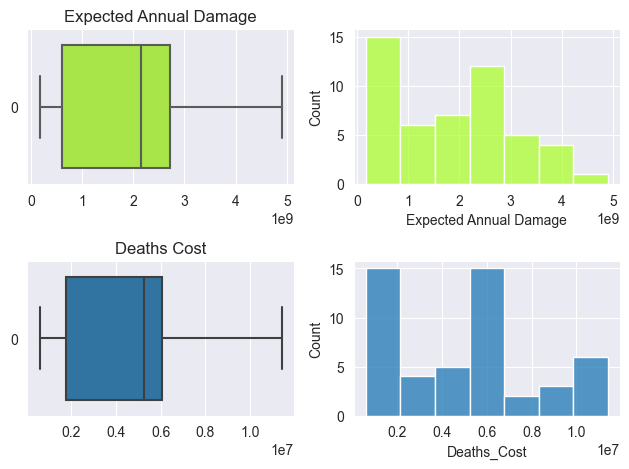

In [14]:
fig, axes = plt.subplots(2,2)

# Expected Annual Damage boxplot
sns.boxplot(
    ax=axes[0,0],
    data=total_values['Expected Annual Damage'],
    orient='h',
    color='greenyellow',
).set(title='Expected Annual Damage')

# Deaths_Cost boxplot
sns.boxplot(
    ax=axes[1,0],
    data=total_values['Deaths_Cost'],
    orient='h',
).set(title='Deaths Cost')

# Expected Annual Damage histogram
sns.histplot(
    ax=axes[0,1],
    data=total_values['Expected Annual Damage'],
    bins=7,
    color='greenyellow',
)

# Deaths_Cost histogram
sns.histplot(
    ax=axes[1,1],
    data=total_values['Deaths_Cost'],
    bins=7,
)

plt.tight_layout()

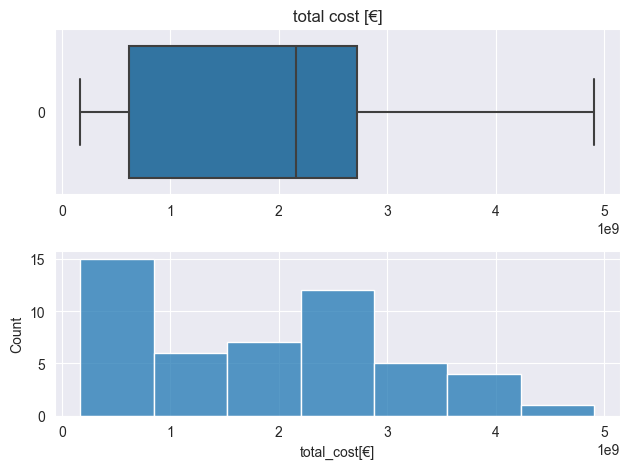

In [15]:
fig, axes = plt.subplots(2)

sns.boxplot(
    ax=axes[0],
    data=results['total_cost[€]'],
    orient='h',
).set(title='total cost [€]')

sns.histplot(
    ax=axes[1],
    data=results['total_cost[€]'],
    bins=7,
)

plt.tight_layout()

Eventueel nog plots per dikering

### DEATH ANALYSIS, SAME CAN BE DONE FOR OTHER VARIABLES

In [16]:
x = results.iloc[:,:19]  # Only take the uncertainties

y_death_cost = total_values['Deaths_Cost'].values
y_death_cost = y_death_cost > np.percentile(y_death_cost, 75)

[MainProcess/INFO] 50 points remaining, containing 13 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.18, coverage: 0.6923076923076923, density: 1.0 restricted_dimensions: 8


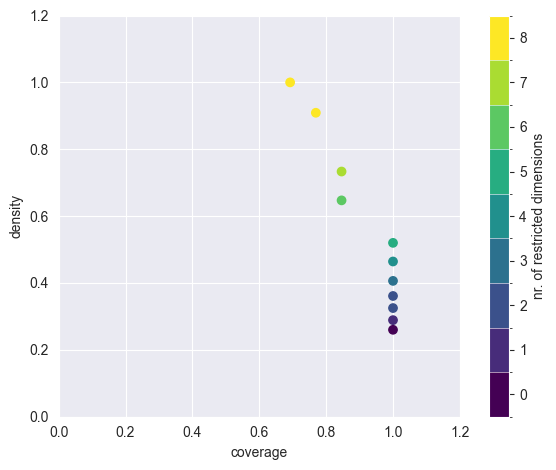

In [17]:
prim_alg = prim.Prim(x,
                     y_death_cost,
                     threshold=0.65,
                     peel_alpha=0.10,) # deze variabelen nog tweaken
box = prim_alg.find_box()

box.show_tradeoff()
plt.tight_layout()

coverage     0.692308
density      1.000000
id          10.000000
mass         0.180000
mean         1.000000
res_dim      8.000000
Name: 10, dtype: float64

                          box 10                                     
                             min              max  qp value  qp value
A.3_Bmax               34.896217       318.901212       NaN  0.164304
A.3_pfail               0.012578         0.854571       NaN  0.387420
A.4_Bmax                 36.3747       327.471412       NaN  0.387420
A.1_Brate            {10.0, 1.5}      {10.0, 1.5}  0.018751       NaN
discount rate 1  {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.094300       NaN
A.4_pfail               0.072138         0.990255  0.387420       NaN
A.1_Bmax               48.923898       290.277367  0.387420  0.424098
A.1_pfail               0.094826         0.918908  1.000000  0.075085



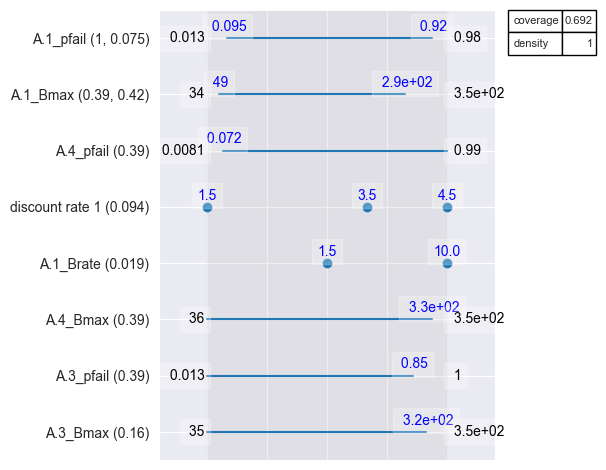

In [18]:
box.inspect()
box.inspect(style='graph')
plt.tight_layout()

C:\Users\beren\Documents\TU_Delft\M_Jaar_1\Q4\Model_based_decision_making\mbd_venv\Lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


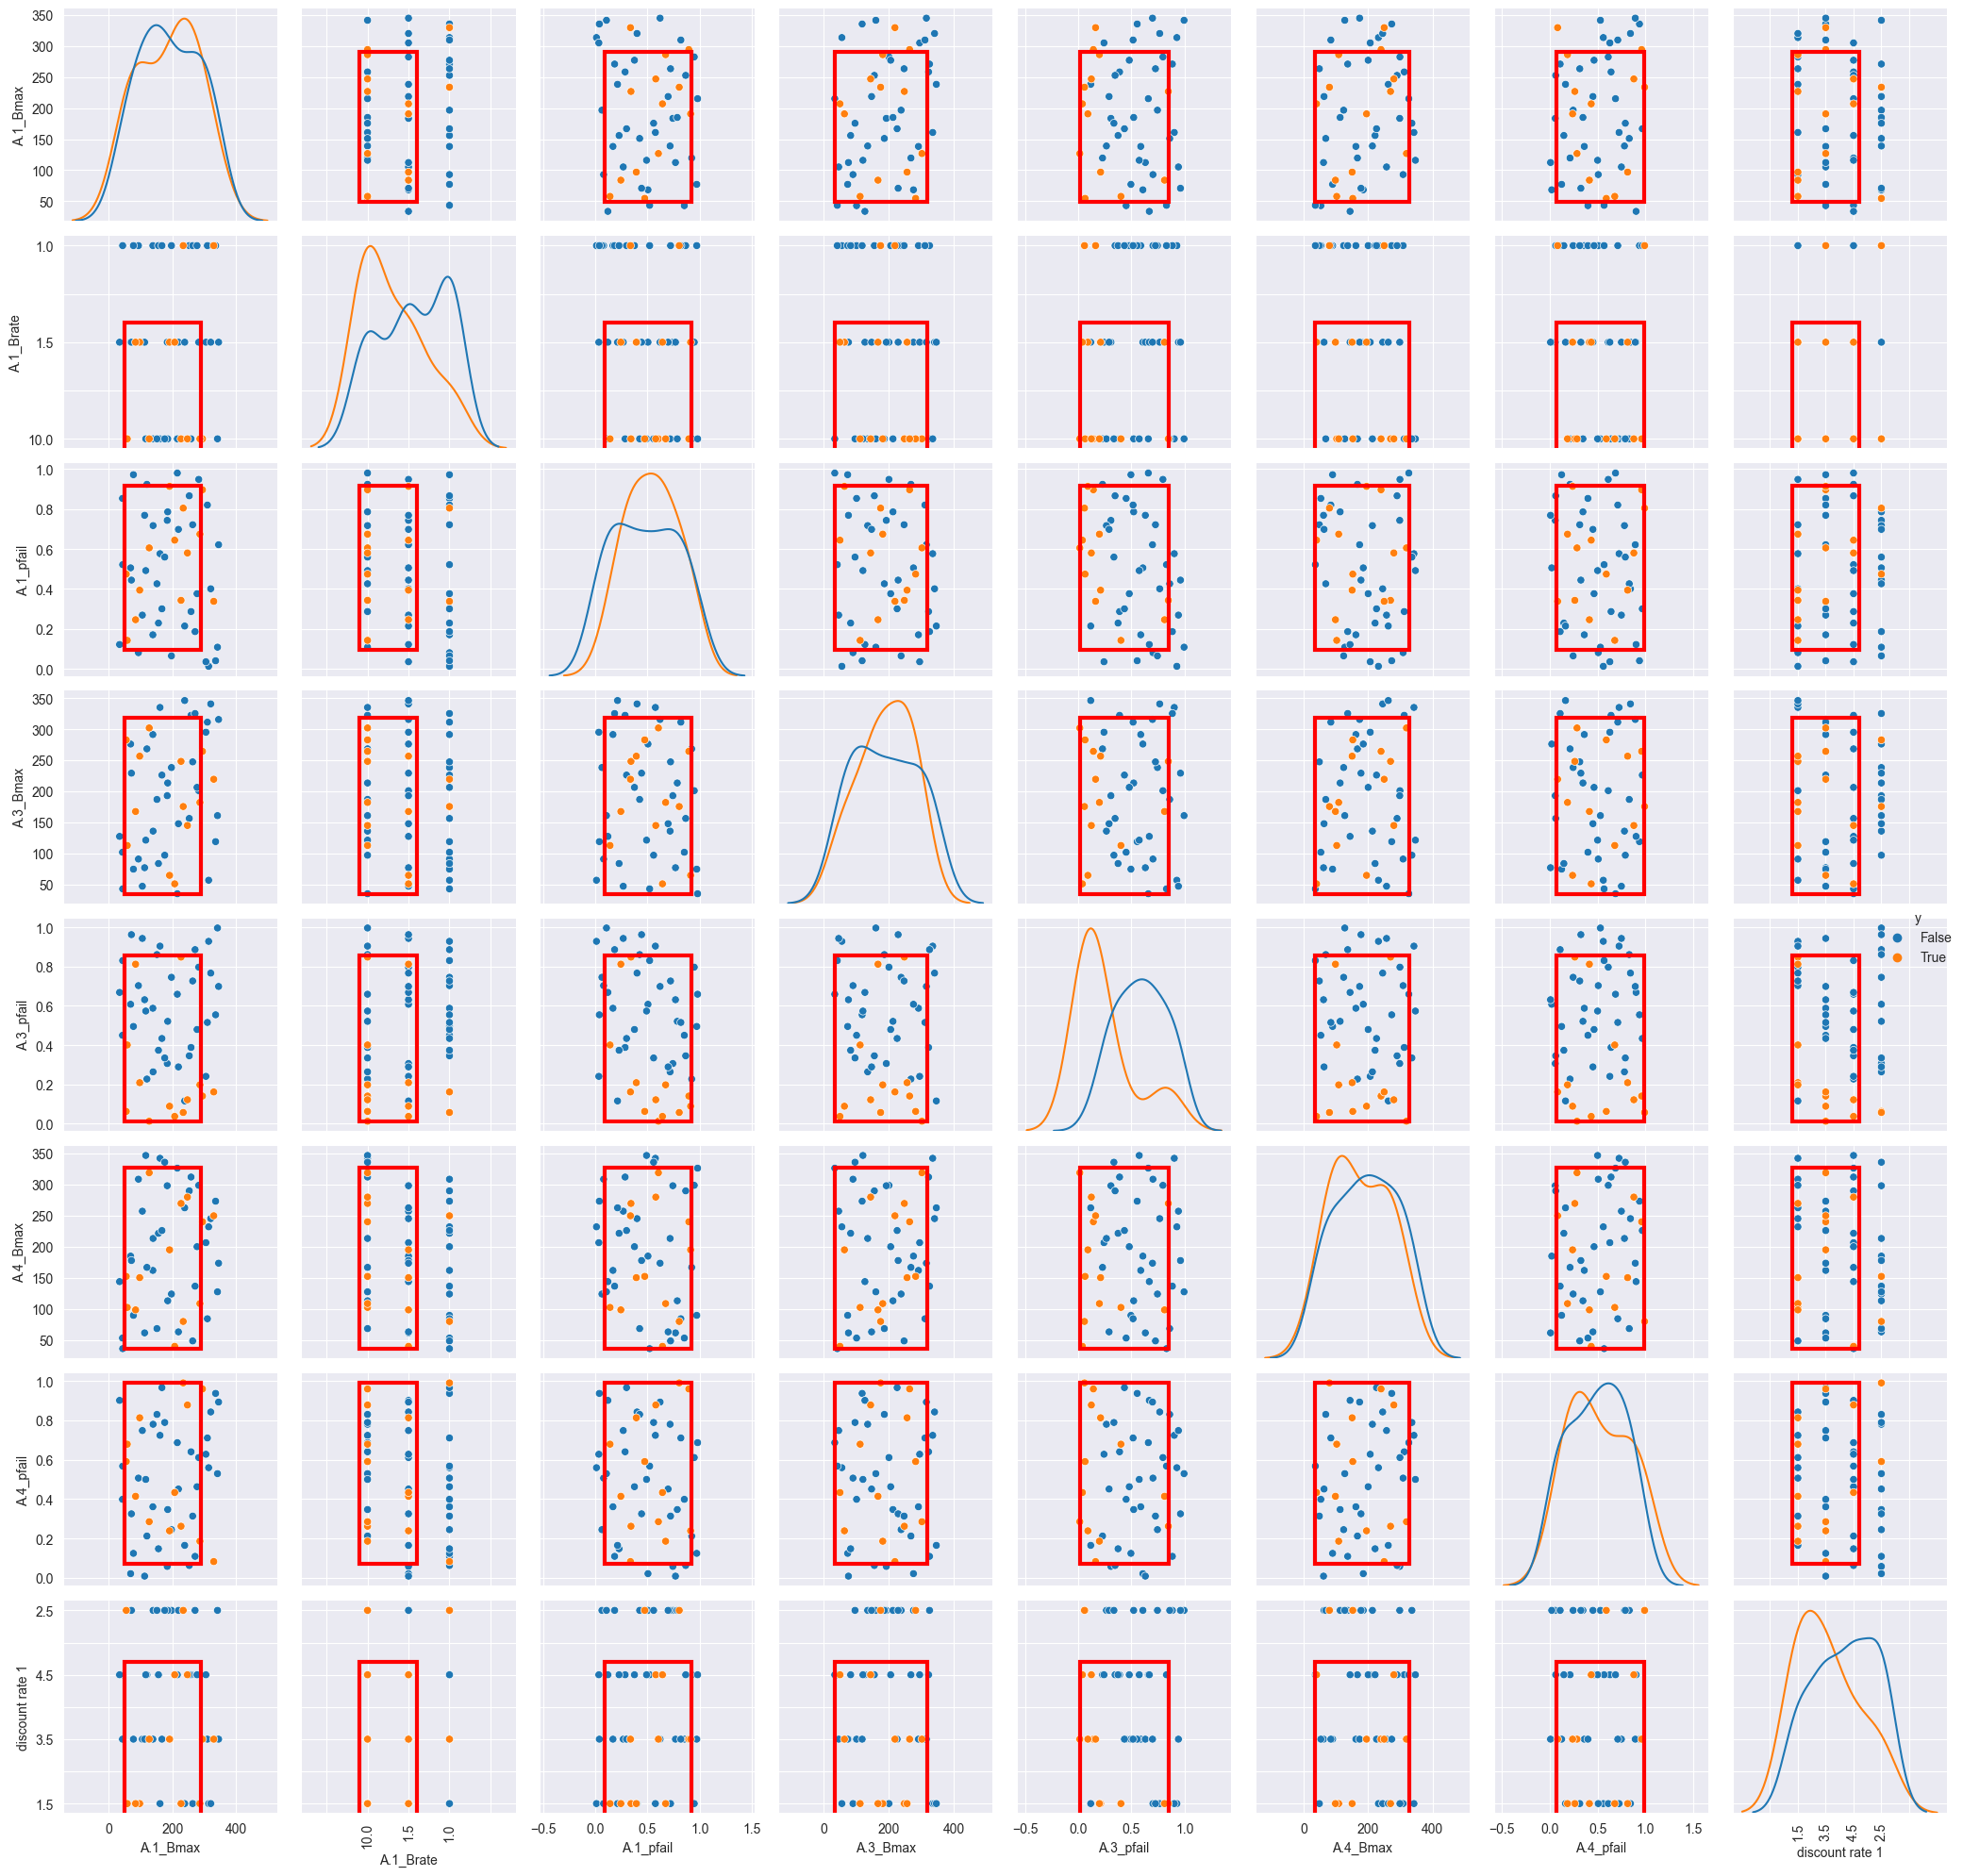

In [19]:
box.select(-1)
box.show_pairs_scatter()
fig = plt.gcf()
plt.tight_layout()

### CART

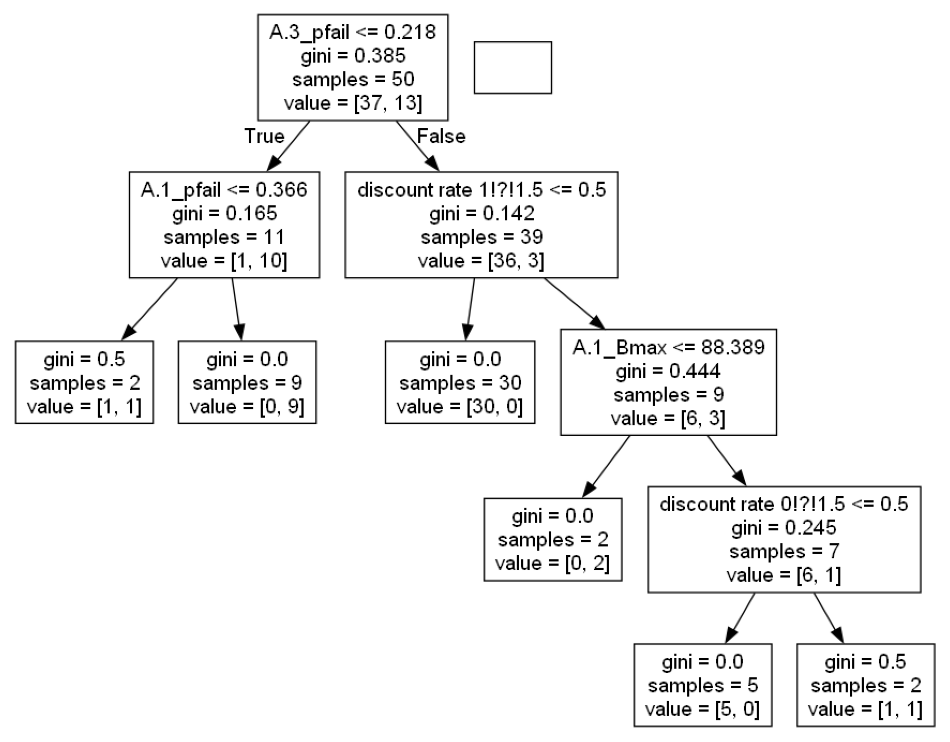

In [20]:
cart_plot = cart.CART(x, y_death_cost, 0.05)
cart_plot.build_tree()

# Make sure to have GraphViz installed for the tree to show up (https://www.graphviz.org/download/)
fig = cart_plot.show_tree()
fig.set_size_inches(12, 12)
plt.show()